In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("C:/Users/DELL/Downloads/assignment/multi linear regression/ToyotaCorolla.csv", encoding='unicode_escape')

In [3]:
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
df = data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [5]:
df

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [6]:
df.shape

(1436, 9)

In [7]:
df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [9]:
df.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [10]:
df[df.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [11]:
df1 = df.drop_duplicates().reset_index(drop=True)

In [12]:
df1.shape

(1435, 9)

In [13]:
df_new = df.rename({"Age_08_04" : "Age", "Quarterly_Tax":"QT", "cc" : "CC"}, axis=1)

In [14]:
df_new.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [15]:
df_new.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


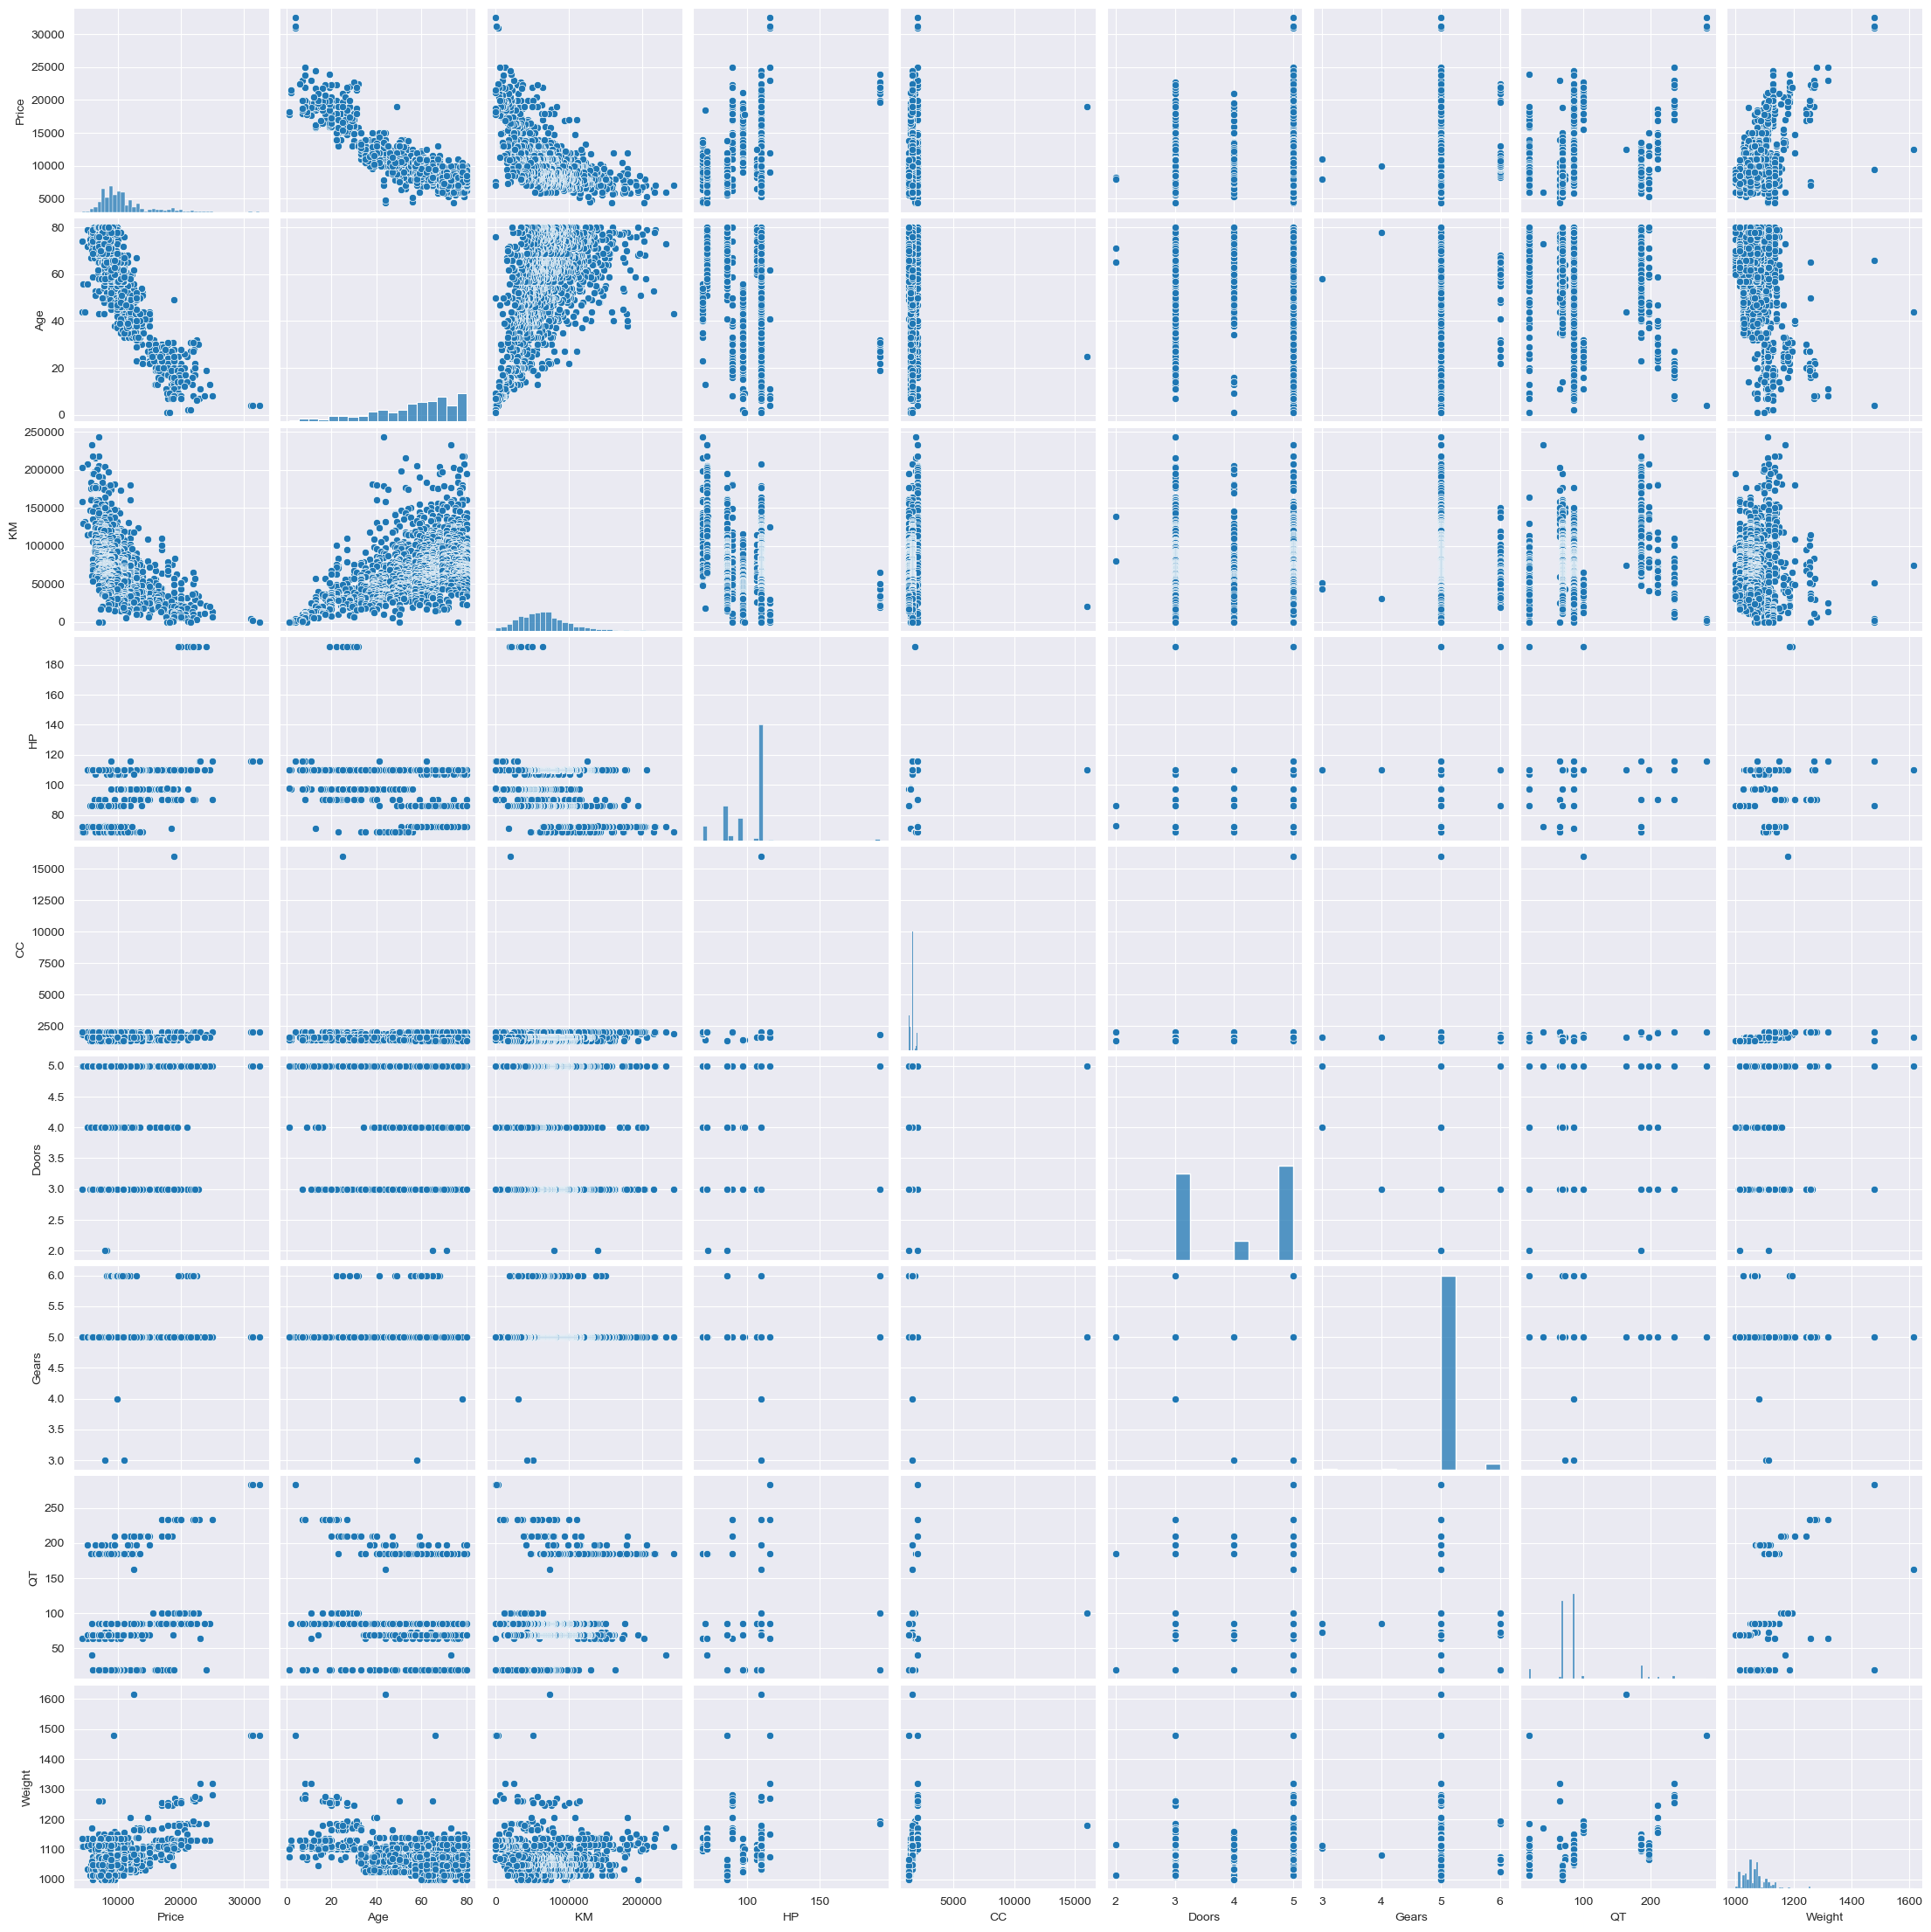

In [16]:
sns.set_style(style = 'darkgrid')
sns.pairplot(df_new)

# Model Building

In [17]:
model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data = df_new).fit()

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sun, 22 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:29:54   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
CC            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
QT             3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
model.params

Intercept   -5573.106358
Age          -121.658402
KM             -0.020817
HP             31.680906
CC             -0.121100
Doors          -1.616641
Gears         594.319936
QT              3.949081
Weight         16.958632
dtype: float64

In [20]:
model.rsquared, model.rsquared_adj

(0.8637627463428192, 0.8629989775766963)

# Checking VIF scores

In [21]:
rsq_Age = smf.ols("Age~ KM+HP+CC+Doors+Gears+QT+Weight",data = df_new).fit().rsquared
vif_Age = 1 / (1-rsq_Age)

rsq_KM = smf.ols("KM~ Age+HP+CC+Doors+Gears+QT+Weight",data = df_new).fit().rsquared
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols("HP~ KM+Age+CC+Doors+Gears+QT+Weight",data = df_new).fit().rsquared
vif_HP = 1/(1-rsq_HP)

rsq_CC = smf.ols("CC~ KM+HP+Age+Doors+Gears+QT+Weight",data = df_new).fit().rsquared
vif_CC = 1/(1-rsq_CC)

rsq_Doors = smf.ols("Doors~ KM+HP+CC+Age+Gears+QT+Weight",data = df_new).fit().rsquared
vif_Doors = 1/(1-rsq_Doors)

rsq_Gears = smf.ols("Gears~ KM+HP+CC+Doors+Age+QT+Weight",data = df_new).fit().rsquared
vif_Gears = 1/(1-rsq_Gears)

rsq_QT = smf.ols("QT~ KM+HP+CC+Doors+Gears+Age+Weight",data = df_new).fit().rsquared
vif_QT = 1/(1-rsq_QT)

rsq_Weight = smf.ols("Weight~ KM+HP+CC+Doors+Gears+QT+Age",data = df_new).fit().rsquared
vif_Weight = 1/(1-rsq_Weight)

In [22]:
vif_data = pd.DataFrame({"Variables" : ['Age','KM', 'HP','CC', 'Doors', 'Gears', 'QT', 'Weight'], "Vif_values" : [vif_Age,vif_KM, vif_HP,vif_CC,vif_Doors,vif_Gears,vif_QT,vif_Weight]})

In [23]:
vif_data

,Variables,Vif_values
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,CC,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,QT,2.311431
7,Weight,2.516420


# Residual Analysis

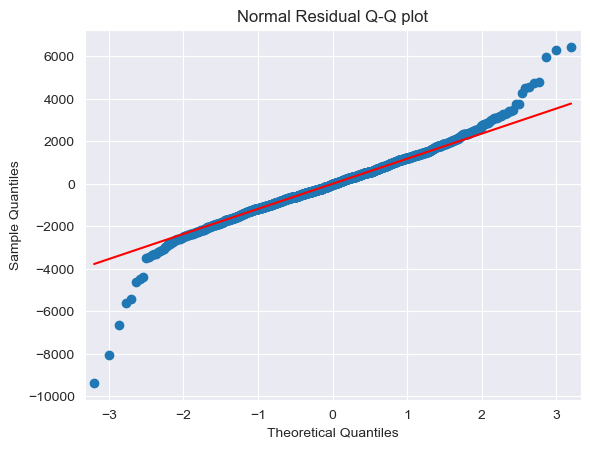

In [24]:
qqplot = sm.qqplot(model.resid, line='q')
plt.title("Normal Residual Q-Q plot")
plt.show()

In [25]:
list(np.where(model.resid<-6000))

[array([221, 601, 960], dtype=int64)]

In [26]:
list(np.where(model.resid>6000))

[array([147, 523], dtype=int64)]

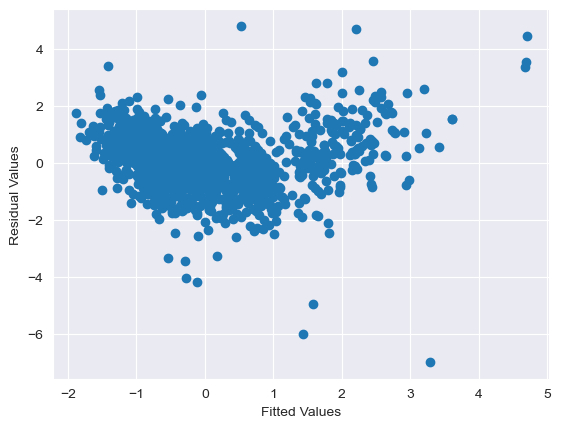

In [27]:
# Check for homoscedasticity

fitted_values = StandardScaler().fit_transform(pd.DataFrame(model.fittedvalues))
residual_values = StandardScaler().fit_transform(pd.DataFrame(model.resid))

plt.scatter(fitted_values, residual_values)
plt.xlabel("Fitted Values")
plt.ylabel("Residual Values")
plt.show()

In [28]:
# Residual vs regressor plot
# to check impact of each independent variable w.r.t model

df_new.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT', 'Weight'], dtype='object')

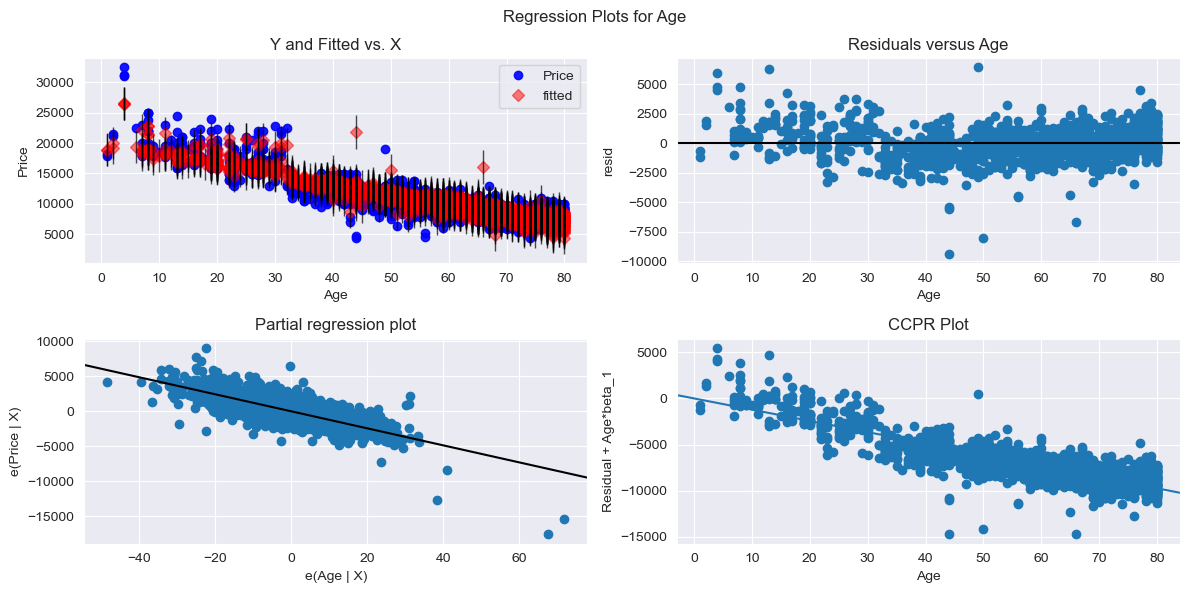

In [29]:
fig = plt.figure(figsize=(12,6))
fig = sm.graphics.plot_regress_exog(model, 'Age', fig=fig)
plt.show()

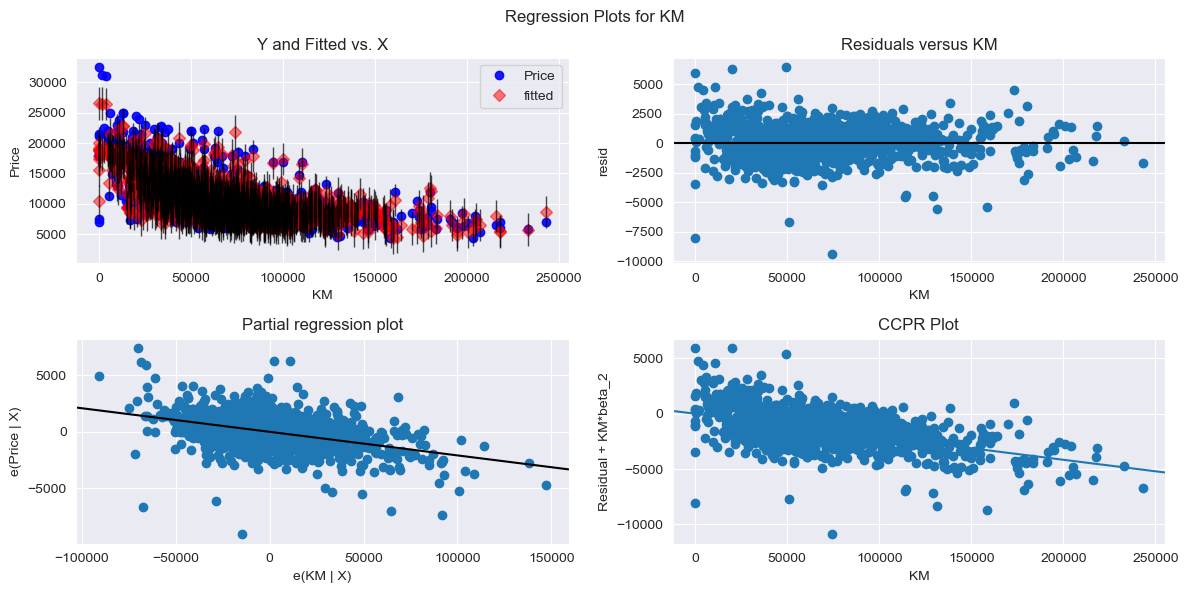

In [30]:
fig = plt.figure(figsize=(12,6))
fig = sm.graphics.plot_regress_exog(model, 'KM', fig=fig)
plt.show()

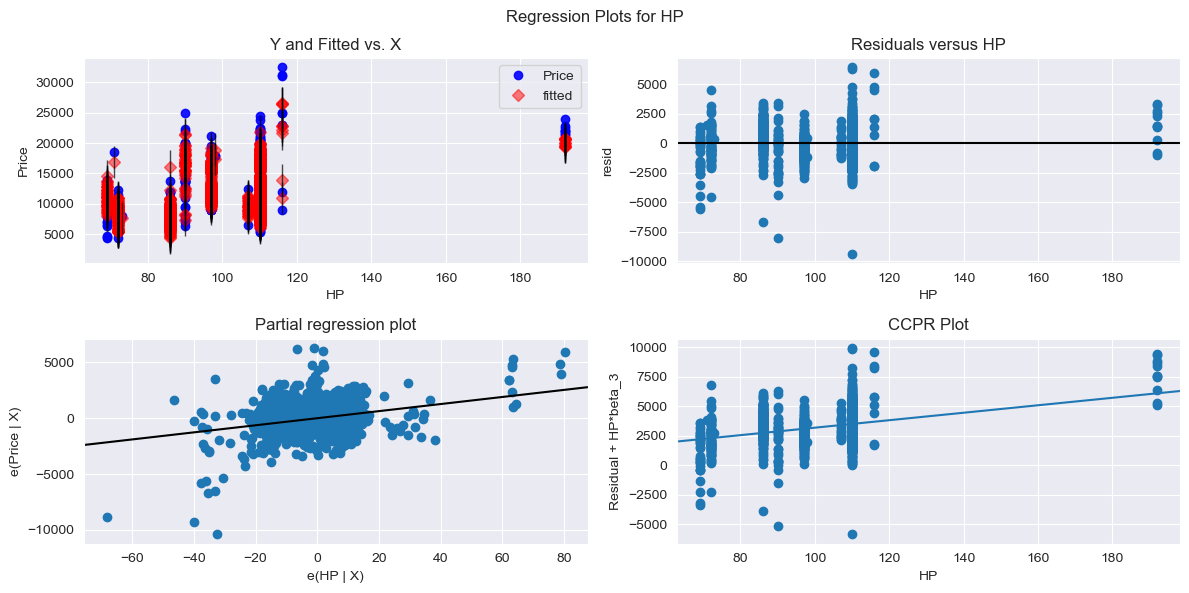

In [31]:
fig = plt.figure(figsize=(12,6))
fig = sm.graphics.plot_regress_exog(model, 'HP', fig=fig)
plt.show()

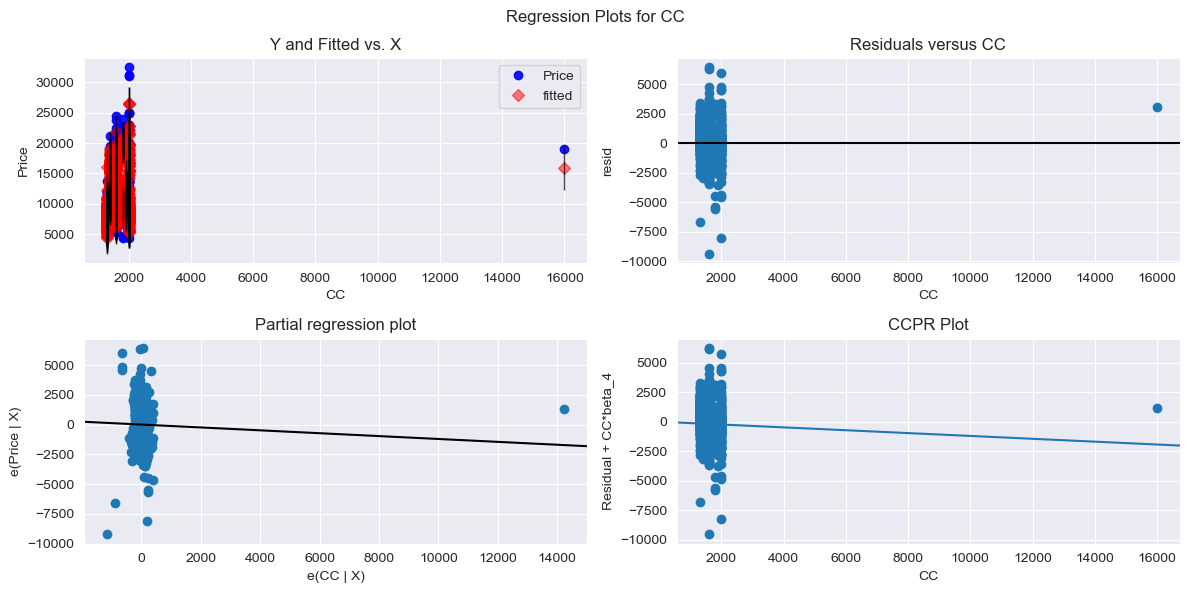

In [32]:
fig = plt.figure(figsize=(12,6))
fig = sm.graphics.plot_regress_exog(model, 'CC', fig=fig)
plt.show()

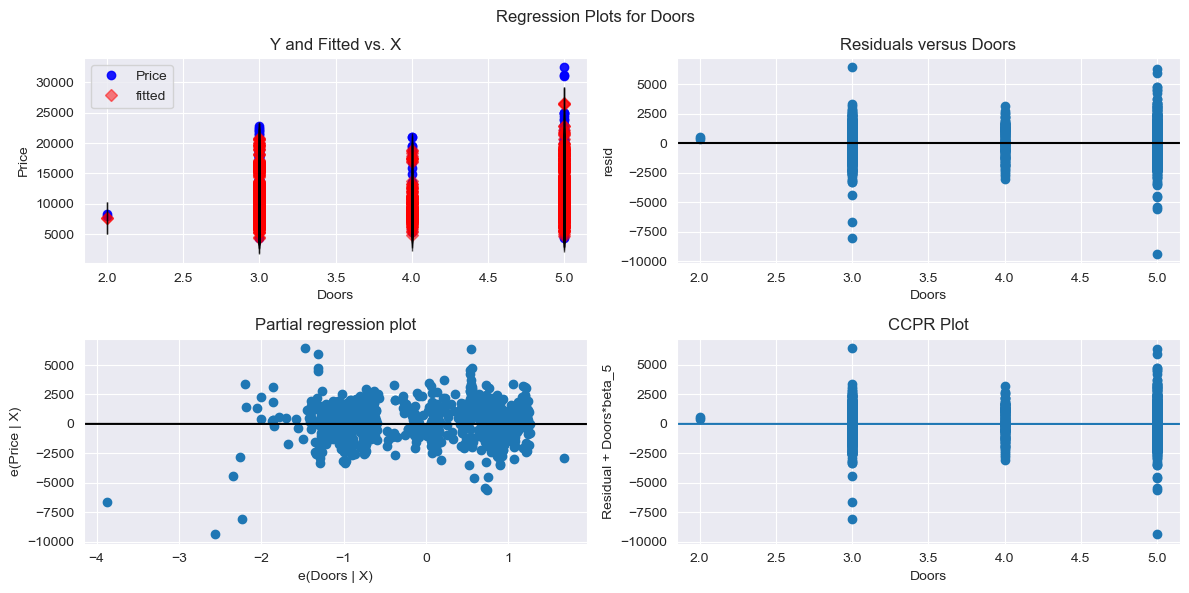

In [33]:
fig = plt.figure(figsize=(12,6))
fig = sm.graphics.plot_regress_exog(model, 'Doors', fig=fig)
plt.show()

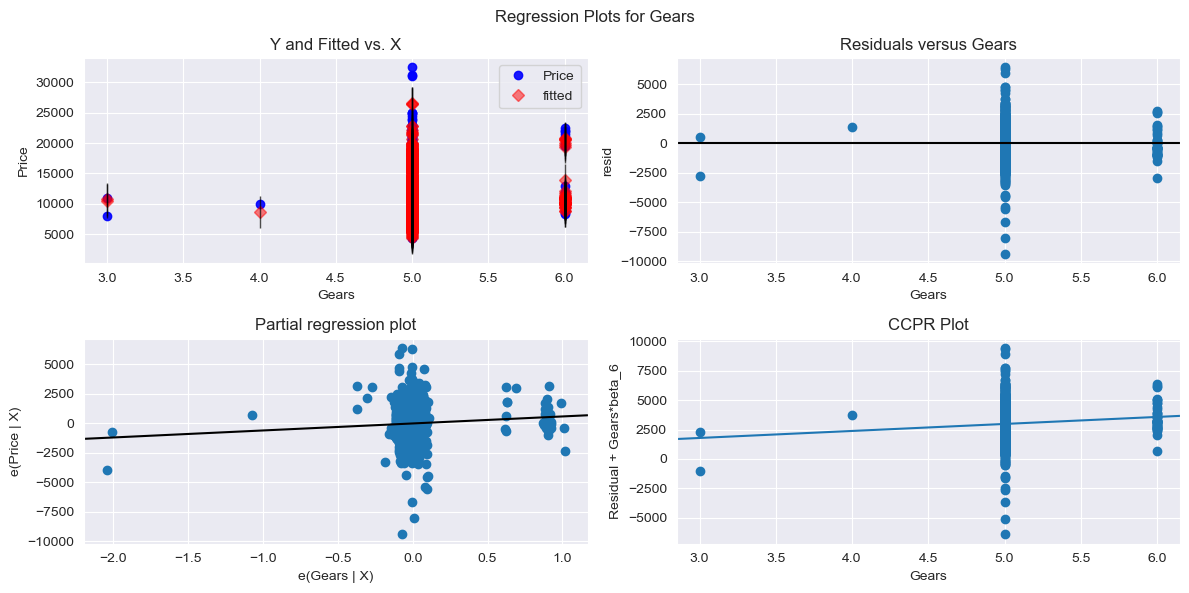

In [34]:
fig = plt.figure(figsize=(12,6))
fig = sm.graphics.plot_regress_exog(model, 'Gears', fig=fig)
plt.show()

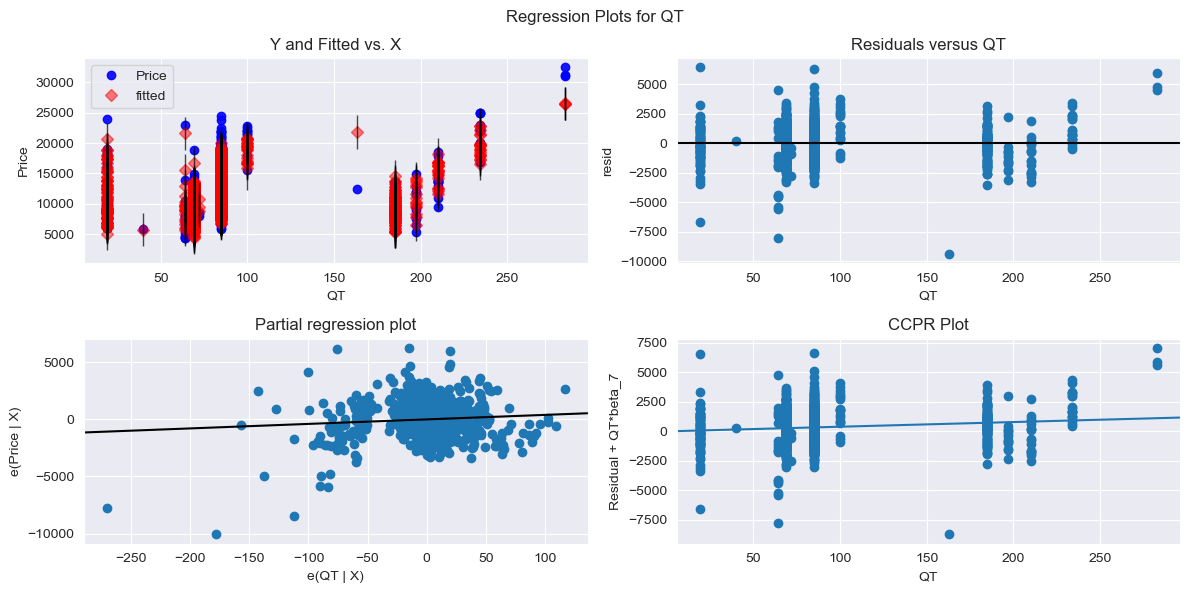

In [35]:
fig = plt.figure(figsize=(12,6))
fig = sm.graphics.plot_regress_exog(model, 'QT', fig=fig)
plt.show()

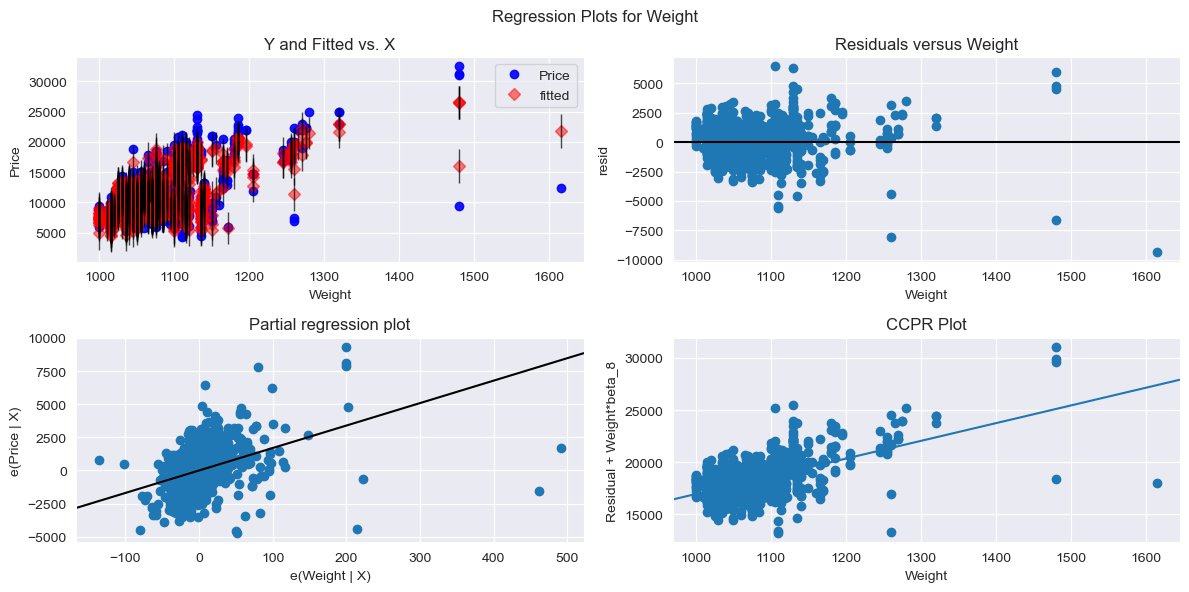

In [36]:
fig = plt.figure(figsize=(12,6))
fig = sm.graphics.plot_regress_exog(model, 'Weight', fig=fig)
plt.show()

# Checking outlier using Cooks Distance

In [37]:
(c,_) = model.get_influence().cooks_distance
c

array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
       8.44762355e-07, 6.97878368e-04, 1.08627724e-02])

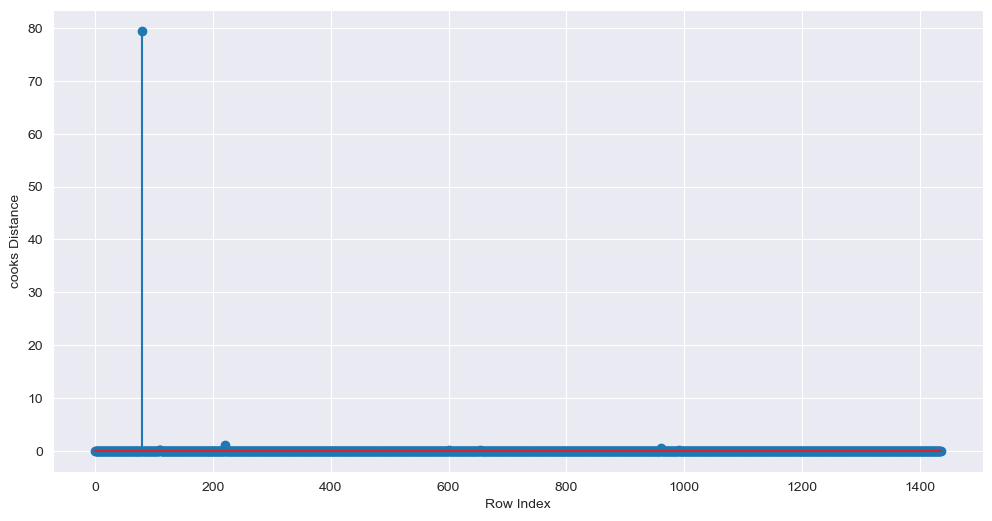

In [38]:
fig = plt.figure(figsize=(12,6))

plt.stem(np.arange(len(df_new)), np.round(c,3))
plt.xlabel("Row Index")
plt.ylabel("cooks Distance")
plt.show()

In [39]:
np.argmax(c), np.max(c)

(80, 79.52010624138181)

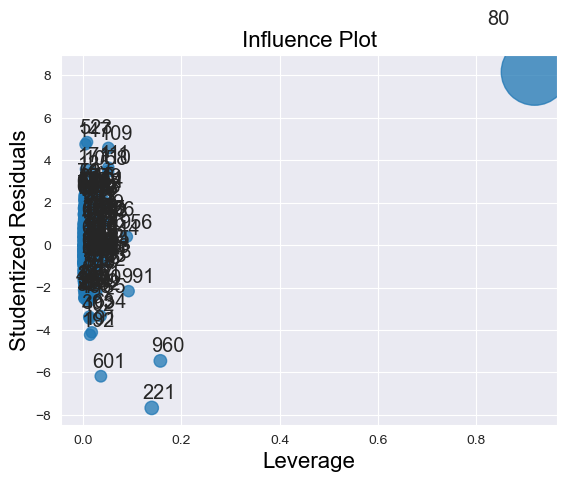

In [40]:
from statsmodels.graphics.regressionplots import influence_plot

influence_plot(model)
plt.show()

In [41]:
k = df.shape[1]
n = df.shape[0]

leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.020891364902506964

In [42]:
df[df_new.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [43]:
df1 = df_new.drop(df.index[80], axis=0).reset_index()
df1

,index,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [44]:
df1.drop(['index'], axis=1, inplace = True)

In [45]:
df1

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [48]:
while np.max(c)> 0.5 :
    model1 = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data = df1).fit()
   
    (c,_) = model1.get_influence().cooks_distance
    c
    np.argmax(c), np.max(c)
    df1 = df1.drop(df1.index[np.argmax(c)], axis=0).reset_index(drop=True)
    df1
else:
    final_model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data= df1).fit()
    final_model.rsquared, final_model.rsquared_adj
    print("Model Accuracy is improved to :" , final_model.rsquared)

Model Accuracy is improved to : 0.8894191849749751


In [49]:
df1

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,1300,3,5,69,1025
1428,10845,72,19000,86,1300,3,5,69,1015
1429,8500,71,17016,86,1300,3,5,69,1015
1430,7250,70,16916,86,1300,3,5,69,1015


In [50]:
# say New data for prediction is
new_data_df=pd.DataFrame({'Age':10,"KM":25600,"HP":100,"CC":125,"Doors":4,"Gears":5,"QT":70,"Weight":1120},index=[0])
new_data_df

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,10,25600,100,125,4,5,70,1120


In [51]:
final_model.predict(new_data_df)

0    23313.231002
dtype: float64